In [92]:
import random
import sys


import pandas as pd
import matplotlib.pyplot as plt


sys.path.append("../")
from sort_algorithms import insert_sort, selection_sort, shell_sort, quick_sort

In [93]:
def generate_random_array(n: int) -> list:
    random_array = [random.randint(1, n + 100) for _ in range(n)]
    return random_array

In [94]:
def metrics_sort_algorithms(arr: list, sort_algorithm: str) -> dict:
    sorting_functions = {
        "insert_sort": insert_sort,
        "selection_sort": selection_sort,
        "shell_sort": shell_sort,
        "quick_sort": quick_sort,
    }

    sorting_function = sorting_functions.get(sort_algorithm)

    execution_time, swaps, iterations, _ = sorting_function(arr)

    return {
        "execution_time": execution_time,
        "swaps": swaps,
        "iterations": iterations,
    }

In [95]:
rounds = 5
results = []
for array_size in [50, 500, 1000, 5000]:
    for _ in range(rounds):
        random_array = generate_random_array(n=array_size)
        for sort_algorithm in [
            "insert_sort",
            "selection_sort",
            "shell_sort",
            "quick_sort",
        ]:
            metrics = metrics_sort_algorithms(
                arr=random_array.copy(), sort_algorithm=sort_algorithm
            )
            data = {
                "sort_algo": sort_algorithm,
                "array_size": array_size,
                "execution_time": metrics.get("execution_time"),
                "swaps": metrics.get("swaps"),
                "iterations": metrics.get("iterations"),
            }
            results.append(data)

In [96]:
df = pd.DataFrame(results)
df.head()

,sort_algo,array_size,execution_time,swaps,iterations
0,insert_sort,50,0.000067,667,716
1,selection_sort,50,0.000066,45,1225
2,shell_sort,50,0.000029,141,203
3,quick_sort,50,0.000044,182,242
4,insert_sort,50,0.000098,591,640


In [97]:
mean_result = df.groupby(by=["sort_algo", "array_size"]).mean()
mean_result = mean_result.reset_index()
mean_result[["swaps", "iterations"]] = mean_result[["swaps", "iterations"]].round(0).astype(int)
mean_result["execution_time_ms"] = mean_result["execution_time"] * 1000
mean_result["execution_time_ms"] = mean_result["execution_time_ms"].round(2)
mean_result = mean_result.drop(columns="execution_time")
mean_result

,sort_algo,array_size,swaps,iterations,execution_time_ms
0,insert_sort,50,631,680,0.08
1,insert_sort,500,62782,63281,6.79
2,insert_sort,1000,249953,250952,25.81
3,insert_sort,5000,6215120,6220119,661.60
4,quick_sort,50,195,248,0.04
5,quick_sort,500,3046,4856,0.83
6,quick_sort,1000,6769,11284,1.53
7,quick_sort,5000,42513,73815,10.55
8,selection_sort,50,45,1225,0.07
9,selection_sort,500,494,124750,6.77


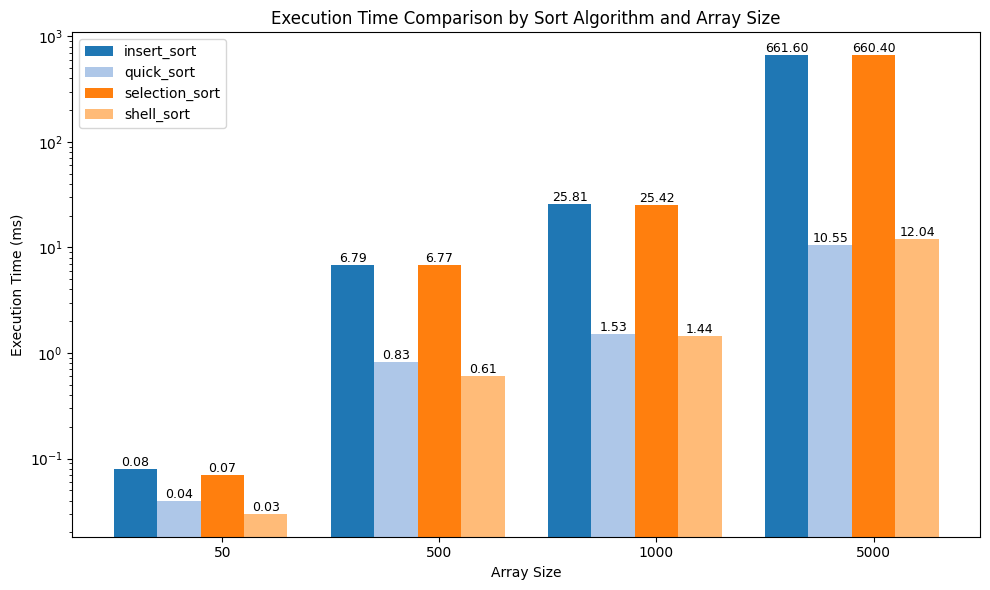

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha o DataFrame mean_result com as colunas "sort_algo", "array_size" e "execution_time_ms"

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Definir a largura das barras
bar_width = 0.2

# Obter a lista de algoritmos
algorithms = mean_result["sort_algo"].unique()

# Agrupar por "sort_algo" e criar um grupo para cada algoritmo
for i, (sort_algo, group) in enumerate(mean_result.groupby("sort_algo")):
    x_positions = [j + i * bar_width for j in range(len(group))]
    plt.bar(
        x_positions,
        group["execution_time_ms"],
        bar_width,
        label=sort_algo,
        color=plt.cm.tab20(i),
    )
    plt.yscale("log")

    # Adicionar o valor de execution_time_ms no topo de cada barra
    for x, y in zip(x_positions, group["execution_time_ms"]):
        plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)

# Definir os tamanhos dos arrays no eixo x
plt.xticks(
    [
        r + bar_width * len(algorithms) / 2
        for r in range(len(mean_result["array_size"].unique()))
    ],
    mean_result["array_size"].unique(),
)

# Configurações do gráfico
plt.xlabel("Array Size")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Time Comparison by Sort Algorithm and Array Size")
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()